In [2]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d utkarshsaxenadn/animal-image-classification-dataset

animal-image-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip animal-image-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1000).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1001).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1002).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1003).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1004).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1005).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1006).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1007).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1008).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1009).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1010).jpeg  
  inflating: Animal-Data-V2/Data-V2/Training Data/Tiger/Tiger (1011).jpeg  
  inflating: Animal-Data-V2/Data-V2/T

In [4]:
!ls

'Animal Classification'   animal-image-classification-dataset.zip   sample_data
 Animal-Data-V2		  drive


In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [18]:
gen_train = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = gen_train.flow_from_directory("Animal-Data-V2/Data-V2/Training Data/", target_size=(256, 256), batch_size=32, class_mode="binary")
gen_val = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_set = gen_val.flow_from_directory("Animal-Data-V2/Data-V2/Validation Data/", target_size=(256, 256), batch_size=32, class_mode="binary")

Found 20000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [22]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, input_shape=(256, 256, 3), kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=492, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [23]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x=training_set, validation_data=validation_set, epochs=25, batch_size=64)

Epoch 1/25
625/625 [==============================] - ETA: 0s - loss: 1.9376 - accuracy: 0.3888

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


625/625 [==============================] - 313s 499ms/step - loss: 1.9376 - accuracy: 0.3888 - val_loss: 1.5169 - val_accuracy: 0.4950
Epoch 2/25
625/625 [==============================] - 309s 494ms/step - loss: 1.3239 - accuracy: 0.5537 - val_loss: 1.2442 - val_accuracy: 0.5860
Epoch 3/25
625/625 [==============================] - 307s 492ms/step - loss: 1.1288 - accuracy: 0.6212 - val_loss: 1.3812 - val_accuracy: 0.5790
Epoch 4/25
625/625 [==============================] - 307s 492ms/step - loss: 0.9762 - accuracy: 0.6749 - val_loss: 1.0811 - val_accuracy: 0.6390
Epoch 5/25
625/625 [==============================] - 305s 488ms/step - loss: 0.8679 - accuracy: 0.7124 - val_loss: 1.0821 - val_accuracy: 0.6580
Epoch 6/25
625/625 [==============================] - 304s 486ms/step - loss: 0.7738 - accuracy: 0.7458 - val_loss: 1.0491 - val_accuracy: 0.6680
Epoch 7/25
625/625 [==============================] - 304s 486ms/step - loss: 0.7030 - accuracy: 0.7705 - val_loss: 0.9931 - val_accura

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
test_image = image.load_img("mini-pocket-bike.jpg", target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)

1/1 [==============================] - 0s 19ms/step
[[0.]]


In [ ]:
training_set.class_indices

{'Bike': 0, 'Car': 1}

In [ ]:
!wget https://www.minipocketrockets.com/products/mini-pocket-bike.jpg

--2022-12-10 14:38:58--  https://www.minipocketrockets.com/products/mini-pocket-bike.jpg
Resolving www.minipocketrockets.com (www.minipocketrockets.com)... 45.76.168.17
Connecting to www.minipocketrockets.com (www.minipocketrockets.com)|45.76.168.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34001 (33K) [image/jpeg]
Saving to: ‘mini-pocket-bike.jpg’

mini-pocket-bike.jp 100%[===================>]  33.20K  --.-KB/s    in 0.06s   

2022-12-10 14:38:58 (549 KB/s) - ‘mini-pocket-bike.jpg’ saved [34001/34001]



In [ ]:
import cv2
import pandas as pd

In [ ]:
img = cv2.imread("wp6522801.jpg")
inp = cv2.resize(img, (256, 256))
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
rgb_tensor = tf.expand_dims(rgb_tensor, 0)

In [ ]:
labels = ["Bike", "Car"]


In [ ]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

width = 1028
height = 1028

#Load image by Opencv2
img = cv2.imread('mini-pocket-bike.jpg')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

# COnverting to uint8
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

In [ ]:
import tensorflow_hub as hub
import pandas as pd

# Loading model directly from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

# Loading csv with labels of classes
labels = pd.read_csv('labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [ ]:
boxes, scores, classes, num_detections = detector(rgb_tensor)

# Processing outputs
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Putting the boxes and labels on the image
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

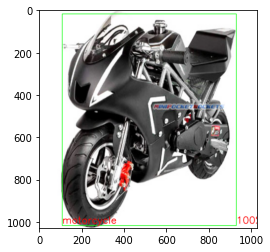

In [ ]:
plt.imshow(img_boxes)